# HW1 DAI Shi Yang Alris 1155179724

Use 4th order polynomial model to approximate 
$$ f(x , y) = cos(x^2 + y^2) $$
 $$(x , y) \in [-1 , 1]^2 $$

Train your model using gradient descent

1. Generate training data from f(x , y)
2. plot: original function vs fitted function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

rng = np.random.default_rng(7)

## Generating training data

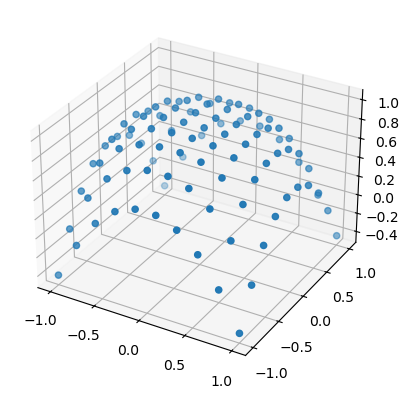

In [ ]:
n_train = 100

# x_train = rng.uniform(-1.0, 1.0, size=n_train)
# y_train = rng.uniform(-1.0, 1.0, size=n_train)

x_train = np.linspace(-1, 1, int(np.sqrt(100)))
y_train = np.linspace(-1, 1, int(np.sqrt(100)))

X_train , Y_train = np.meshgrid(x_train , y_train)
Z_train = np.cos(X_train  **  2 + Y_train ** 2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train, Y_train, Z_train, marker =  'o')

training_data = np.column_stack((X_train.ravel(), Y_train.ravel() , Z_train.ravel()))

In [27]:


def polynomial_features(dataset, degree=4):
    x = dataset[:, 0]
    y = dataset[:, 1]
    features = []
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            features.append((x**i) * (y**j))
    return np.column_stack(features)


X = polynomial_features(training_data, degree=4)
number_of_thetas = X.shape[1] + 1

X_b = np.c_[np.ones((X.shape[0], 1)), X]
thetas = np.random.rand(X.shape[1] + 1 , 1)
print(f'X_b shape: {X_b.shape}')
print(f'thetas shape: {thetas.shape}')

z = Z_train.ravel()
print(f'z shape: {z.shape}')

def computeCost(thetas , X , z):
    m = X.shape[0]
    predictions = np.dot(X, thetas)
    cost = (1 / (2 * m)) * np.sum((predictions - z.reshape(-1, 1)) ** 2)
    return cost


print(computeCost(thetas , X_b , z))

X_b shape: (100, 16)
thetas shape: (16, 1)
z shape: (100,)
2.6401006078861564


(5000, 16)
[[ 7.77226834e-01]
 [ 2.65615977e-01]
 [-1.27083731e-02]
 [-2.03300693e-01]
 [ 1.42356769e-02]
 [-3.21890891e-01]
 [-6.27132746e-05]
 [ 1.24031686e-01]
 [ 2.48237517e-04]
 [-8.91332411e-02]
 [-2.41609370e-01]
 [ 4.17215316e-03]
 [-4.50265831e-01]
 [-6.09434098e-05]
 [-7.48363155e-02]
 [-2.85444312e-01]]
[[ 7.77223687e-01]
 [ 2.65612830e-01]
 [-1.26794590e-02]
 [-2.03306079e-01]
 [ 1.42036417e-02]
 [-3.21857578e-01]
 [-6.24822992e-05]
 [ 1.23941943e-01]
 [ 2.47029410e-04]
 [-8.90630883e-02]
 [-2.41596574e-01]
 [ 4.16204665e-03]
 [-4.50334012e-01]
 [-6.05496144e-05]
 [-7.47878291e-02]
 [-2.85428298e-01]]
[[ 7.77220546e-01]
 [ 2.65609689e-01]
 [-1.26506109e-02]
 [-2.03311470e-01]
 [ 1.41716779e-02]
 [-3.21824304e-01]
 [-6.22522885e-05]
 [ 1.23852266e-01]
 [ 2.45827248e-04]
 [-8.89929948e-02]
 [-2.41583791e-01]
 [ 4.15196625e-03]
 [-4.50402088e-01]
 [-6.01579817e-05]
 [-7.47393691e-02]
 [-2.85412315e-01]]
[[ 7.77217409e-01]
 [ 2.65606552e-01]
 [-1.26218287e-02]
 [-2.03316867e-01

Text(0.5, 1.0, 'Cost function using Gradient Descent')

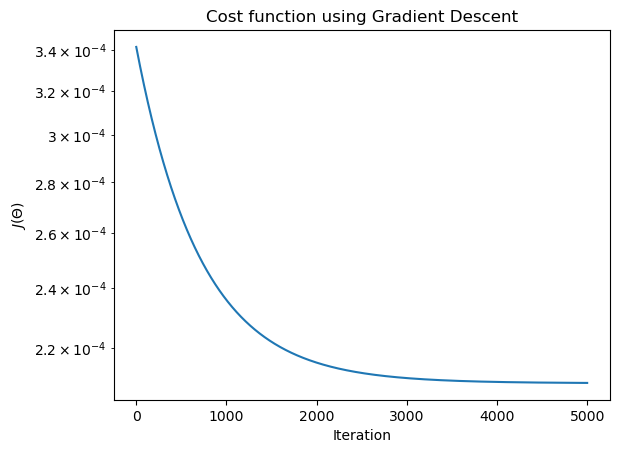

In [39]:
def gradient_descent(X , z , thetas, alpha = 0.1, iterations = 100):
    m = X.shape[0]
    cost_history = np.zeros(iterations)
    thetas_history = np.zeros((iterations,thetas.shape[0]))
    print(thetas_history.shape)


    for it in range(iterations):

        predictions = np.dot(X, thetas)
        thetas = thetas - (alpha / m) * np.dot((predictions - z.reshape(-1, 1)).T, X).T
        print(thetas)
        thetas_history[it, :] = thetas.ravel()

        cost_history[it] = computeCost(thetas , X , z)
    return thetas, cost_history, thetas_history

thetas, cost_history, thetas_history = gradient_descent(X_b , z , thetas, alpha=0.1, iterations=5000)

# print(f'thetas: {thetas}')
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.yscale("log")
plt.title("Cost function using Gradient Descent")


Epoch 0, Loss: 0.587186
Epoch 2000, Loss: 0.000150
Epoch 4000, Loss: 0.000133
Epoch 6000, Loss: 0.000131
Epoch 8000, Loss: 0.000131


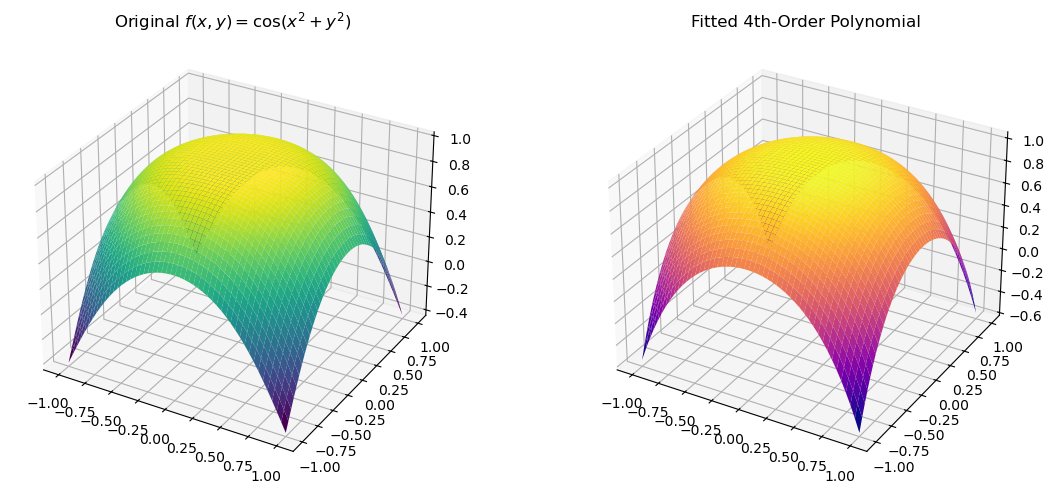

In [ ]:
# Complete code as above
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate data
def f(x, y):
    return np.cos(x**2 + y**2)

np.random.seed(42)
n_samples = 500
X_train = np.random.uniform(-1, 1, (n_samples, 2))
y_train = f(X_train[:, 0], X_train[:, 1])

# 2. Polynomial features (degree 4)
def polynomial_features(X, degree=4):
    x = X[:, 0]
    y = X[:, 1]
    features = []
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            features.append((x**i) * (y**j))
    return np.column_stack(features)

thetas_train = polynomial_features(X_train, degree=4)

# 3. Gradient descent
def gradient_descent(thetas, y, lr=0.01, epochs=10000):
    n_features = thetas.shape[1]
    w = np.zeros(n_features)
    n_samples = thetas.shape[0]
    
    for epoch in range(epochs):
        y_pred = thetas @ w
        error = y_pred - y
        grad = (2/n_samples) * (thetas.T @ error)
        w -= lr * grad
        
        if epoch % 2000 == 0:
            loss = np.mean(error**2)
            print(f"Epoch {epoch}, Loss: {loss:.6f}")
    
    return w

weights = gradient_descent(thetas_train, y_train, lr=0.1, epochs=10000)

# 4. Predict function
def predict(X, w, degree=4):
    Phi = polynomial_features(X, degree)
    return Phi @ w

# 5. Plot
grid_size = 50
x_grid = np.linspace(-1, 1, grid_size)
y_grid = np.linspace(-1, 1, grid_size)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
grid_points = np.column_stack([X_grid.ravel(), Y_grid.ravel()])

Z_original = f(X_grid, Y_grid)
Z_pred = predict(grid_points, weights).reshape(grid_size, grid_size)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X_grid, Y_grid, Z_original, cmap='viridis')
ax1.set_title('Original $f(x, y) = \cos(x^2 + y^2)$')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X_grid, Y_grid, Z_pred, cmap='plasma')
ax2.set_title('Fitted 4th-Order Polynomial')

plt.tight_layout()
plt.show()